# User Knowledge Modeling K-means Clustering

This is a real dataset about the students' knowledge status about the subject of Electrical DC Machines. We are going to cluster them based on their respones and actions. We know the value of K as the distrbution of the class attribute is known which is 4. 

The dataset has five features and we are going to reduce them to two using PCA, just so we can visualize the clusters. 

In [1]:
# we are first going to import the data in a pandas dataframe
import pandas as pd
df = pd.read_csv("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.csv")
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [2]:
# We will also view the distrbution of the classes across the dataset
df.groupby([" UNS"])[" UNS"].count()

 UNS
High        63
Low         83
Middle      88
very_low    24
Name:  UNS, dtype: int64

In [3]:
# Next we are going to store the number of classes in a variable called K, and the rest data , after droping column
# UNS, in a varialble called X.
from collections import Counter
dit = Counter(df[" UNS"])
K = len(dit)
y = df[" UNS"]
X = df.drop([" UNS"], axis=1)
X.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24


In [4]:
# There's no need of scalling the data as the data is already scaled
X.max() - X.min()

STG    0.99
SCG    0.90
STR    0.95
LPR    0.99
PEG    0.93
dtype: float64

In [5]:
# Now we are going to convert the above data into a giant matrix using the numpy array
import numpy as np
X = np.array(X)
print(X)

[[ 0.    0.    0.    0.    0.  ]
 [ 0.08  0.08  0.1   0.24  0.9 ]
 [ 0.06  0.06  0.05  0.25  0.33]
 ..., 
 [ 0.54  0.82  0.71  0.29  0.77]
 [ 0.5   0.75  0.81  0.61  0.26]
 [ 0.66  0.9   0.76  0.87  0.74]]


In [6]:
# We will reduce the dimensions into 2 so that we can visualize the clusters. We will use PCA to achieve this.
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=False).fit(X)
X_trans = pca.transform(X)

What we have done is that we have distilled the 5D data into 2D data by projecting it down to two orthogonal 5D vectors whichs will be the basis of our 2D projections.  

In [7]:
# Now we will see how much information we have manages to preserve
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[ 0.30196292  0.24277184]
0.544734759403


Using PCA we have managed to capture 54% of the variance in the dataset in two dimensions. Now we can cluster them using K-means algorithm. Let's see what we get

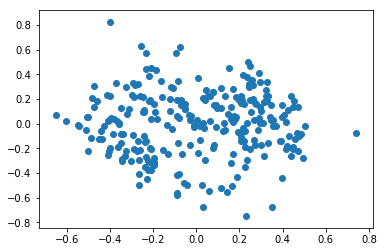

In [8]:
# first we check the spread of the datapoints on a graph
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_trans[:, 0], X_trans[:, 1])
plt.show()


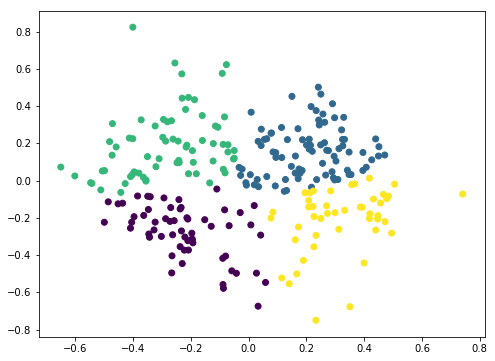

Cluster bin sizes  Counter({1: 85, 2: 68, 0: 59, 3: 46})


In [78]:
# Now we will use the sklearn k means package to draw the 4 clusters. Then we will implement our own implementation
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model = model.fit(X_trans)
plt.figure(figsize=(8, 6))
plt.scatter(X_trans[:,0], X_trans[:,1], c=model.labels_.astype(float))
plt.show()
print("Cluster bin sizes ", Counter(model.labels_))

Although not obvious to the human eye. K-means has successfully clustered the data into four groups. Since we have lost information while transforming 5 dimensions into 2, there are discrepancies in the clusters.

In [64]:
print("Actual class bin sizes ", Counter(y))
print("Cluster bin sizes ", Counter(model.labels_))

Actual class bin sizes  Counter({'Middle': 88, 'Low': 83, 'High': 63, 'very_low': 24})
Cluster bin sizes  Counter({1: 85, 2: 68, 0: 59, 3: 46})


In [127]:
# Now we will implement our own K-means algo 
import numpy as np
from collections import defaultdict
from random import randint as rand

# Now we will implement our own K-means algo 
class k_means(object):
    def __init__(self, K=2):
        self.K = K
    
    @staticmethod
    def new_centroids(clusters):
        """
        This function returns the updated centroids after computing the mean
        of each cluster
        """
        return [np.mean(i, axis=0) for i in clusters.values()]
    
    @classmethod
    def clustering(cls, clusters, data, rd_points):
        """
        This function puts the data into their respective clusters
        """
        for i in data:
            clusters[cls.lable(data_point=i, points=rd_points)].append(i)
        return
    
    @classmethod 
    def lable(cls, data_point, points):
        """
        This function returns the labels of a data point
        """
        values = [cls.euclid_dis(data_point, i) for i in points]
        return min(range(len(values)), key=values.__getitem__)
    
    @classmethod
    def centroids(cls, data, K):
        """
        Now we are going to randomly select K indexes and make them our centroids
        """
        mean_p = np.mean(data, axis=0)
        dist_log = []
        result = []
        while len(result) < K:
            if not dist_log:
                p = data[rand(0, K - 1)]
                result.insert(0, p)
                dist_log.insert(0, cls.euclid_dis(mean_p, p))
            else:
                for i in data:
                    p = i
                    if np.any(result == p):
                        continue
                    d = cls.euclid_dis(p, result[0])
                    if d > dist_log[0]:
                        result.insert(0, p)
                        dist_log.insert(0, cls.euclid_dis(mean_p, p))
                        break
        return result    
        
    @staticmethod
    def euclid_dis(a, b):
        """
        We are using the norm function of numpy to calculate the euclidean distance
        """
        return np.linalg.norm(a - b)
        
    def fit(self, data):
        """
        The main function that will return the lables of the data
        """
        # initialize centroids randomly
        rd_points = k_means.centroids(data, K=self.K)
        
        # initialize book keeping variables
        counter = False
        clusters = None
        change_log = []
        
        # initializing the main loop
        while counter is False:
            # we will store each cluster in a list
            clusters = defaultdict(list)
            
            # putting the data into their own clusters based on the centroids
            k_means.clustering(clusters, data, rd_points)
             
            # change centroid based on cluster mean
            rd_points = k_means.new_centroids(clusters)
            
            # now we are going to see if there are any changes in the cluster
            temp = [len(i) for i in clusters.values()]
            if not change_log:
                change_log = temp
            else:
                if temp == change_log:
                    counter = True
                else:
                    change_log = temp
                    
        self.points = rd_points
        self.data = data
        
    def labels(self):
        """
        This function returns the labels of each and every data point in the
        dataset
        """
        r = []
        for i in self.data:
            r.append(k_means.lable(i, self.points))
        return np.array(r)
        

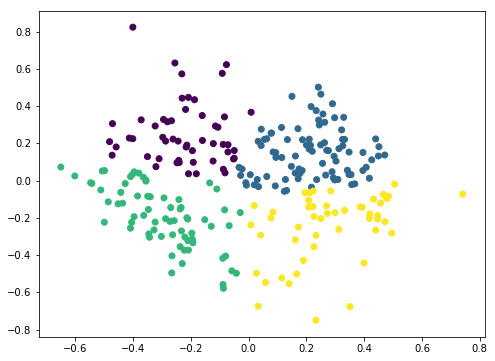

In [134]:
# now we are going to implement our own implementationg of k-means
model2 = k_means(4)
model2.fit(X_trans)
labels = model2.labels()
plt.figure(figsize=(8, 6))
plt.scatter(X_trans[:,0], X_trans[:,1], c=labels.astype(float))
plt.show()

In [135]:
# Now let's see the bin sizes of our custom k-means solutions
Counter(labels)

Counter({0: 52, 1: 87, 2: 70, 3: 49})

There is a stochastic component to k-means, which makes the outcome unpredictable. To increase the performance of this model, I have used euclidean distance among the points to generate the initial centroids, so as to get more spread out data points. 